In [1]:
pip install seaborn

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [15]:
drive.mount('/content/drive')
dados = pd.read_csv('/content/drive/My Drive/MTCN/Movimentacoes_Aeroportuarias_202301.csv',
                     header = 1,
                      sep = ';')
#print (df)
#df = sns.load_dataset("penguins")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-15-29835ae0b0b6>:2: DtypeWarning: Columns (8,17) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv('/content/drive/My Drive/MTCN/Movimentacoes_Aeroportuarias_202301.csv',


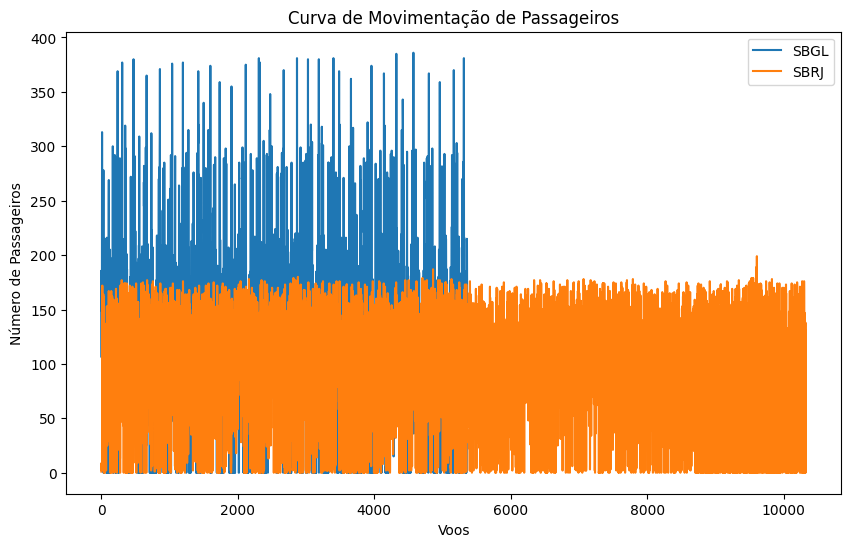

In [47]:
dados_aeroportos = {}

for index, row in dados.iterrows():
    local_saida = row['NR_AEROPORTO_REFERENCIA']
    local_chegada = row['NR_VOO_OUTRO_AEROPORTO']
    passageiros = row['QT_PAX_LOCAL'] + row['QT_PAX_CONEXAO_DOMESTICO'] + row['QT_PAX_CONEXAO_INTERNACIONAL']

    # Adicionar passageiros ao aeroporto de saída
    if local_saida not in dados_aeroportos:
        dados_aeroportos[local_saida] = []
    dados_aeroportos[local_saida].append(passageiros)

    # Adicionar passageiros ao aeroporto de chegada
    if local_chegada not in dados_aeroportos:
        dados_aeroportos[local_chegada] = []
    dados_aeroportos[local_chegada].append(passageiros)


Galeao = 'SBGL'
SDU = 'SBRJ'

plt.figure(figsize=(10, 6))
plt.plot(dados_aeroportos[Galeao], label=Galeao)
plt.plot(dados_aeroportos[SDU], label=SDU)

# Adicionar rótulos e título
plt.xlabel('Voos')
plt.ylabel('Número de Passageiros')
plt.title('Curva de Movimentação de Passageiros')
plt.legend()

# Exibir o gráfico
plt.show()

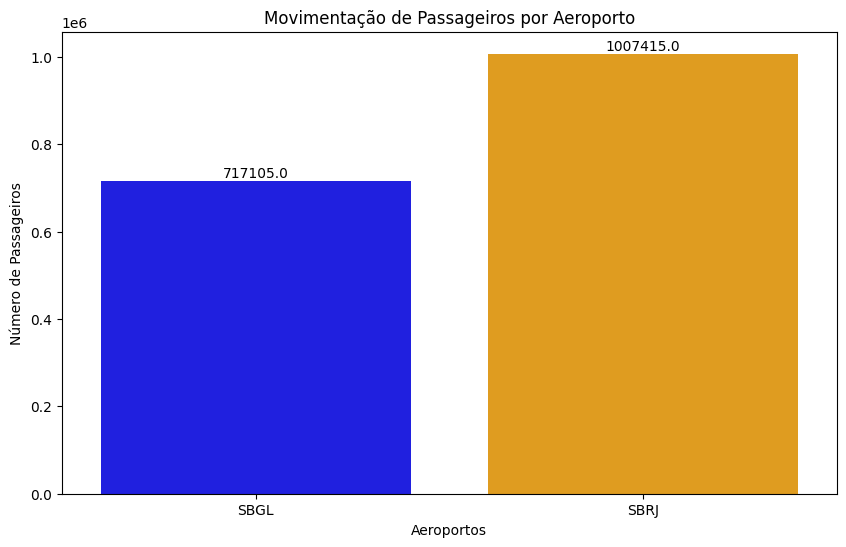

In [50]:
dados_aeroportos_barra = {}

for index, row in dados.iterrows():
    local_saida = row['NR_AEROPORTO_REFERENCIA']
    local_chegada = row['NR_VOO_OUTRO_AEROPORTO']
    passageiros = row['QT_PAX_LOCAL'] + row['QT_PAX_CONEXAO_DOMESTICO'] + row['QT_PAX_CONEXAO_INTERNACIONAL']

    # Adicionar passageiros ao aeroporto de saída
    if local_saida not in dados_aeroportos_barra:
        dados_aeroportos_barra[local_saida] = 0
    dados_aeroportos_barra[local_saida] += passageiros

    # Adicionar passageiros ao aeroporto de chegada
    if local_chegada not in dados_aeroportos_barra:
        dados_aeroportos_barra[local_chegada] = 0
    dados_aeroportos_barra[local_chegada] += passageiros

Galeao = 'SBGL'
SDU = 'SBRJ'


# Criar o DataFrame para os dados do Seaborn
dados_seaborn = pd.DataFrame({
    'Aeroporto': [Galeao, SDU],
    'Passageiros': [dados_aeroportos_barra[Galeao], dados_aeroportos_barra[SDU]]
})

df = pd.DataFrame(dados_seaborn, columns=['Aeroporto', 'Passageiros'])

# Criar o gráfico de barras usando Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Aeroporto', y='Passageiros', palette=['blue', 'orange'])

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Adicionar rótulos e título
plt.xlabel('Aeroportos')
plt.ylabel('Número de Passageiros')
plt.title('Movimentação de Passageiros por Aeroporto')

# Exibir o gráfico
plt.show()

<ipython-input-74-becc78206ae0>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  passageiros_por_aeroporto = voos_filtrados.groupby('NR_VOO_OUTRO_AEROPORTO')['QT_PAX_LOCAL', 'QT_PAX_CONEXAO_DOMESTICO', 'QT_PAX_CONEXAO_INTERNACIONAL'].sum()
<ipython-input-74-becc78206ae0>:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  passageiros_por_aeroporto = voos_filtrados.groupby('NR_VOO_OUTRO_AEROPORTO')['QT_PAX_LOCAL', 'QT_PAX_CONEXAO_DOMESTICO', 'QT_PAX_CONEXAO_INTERNACIONAL'].sum().reset_index()


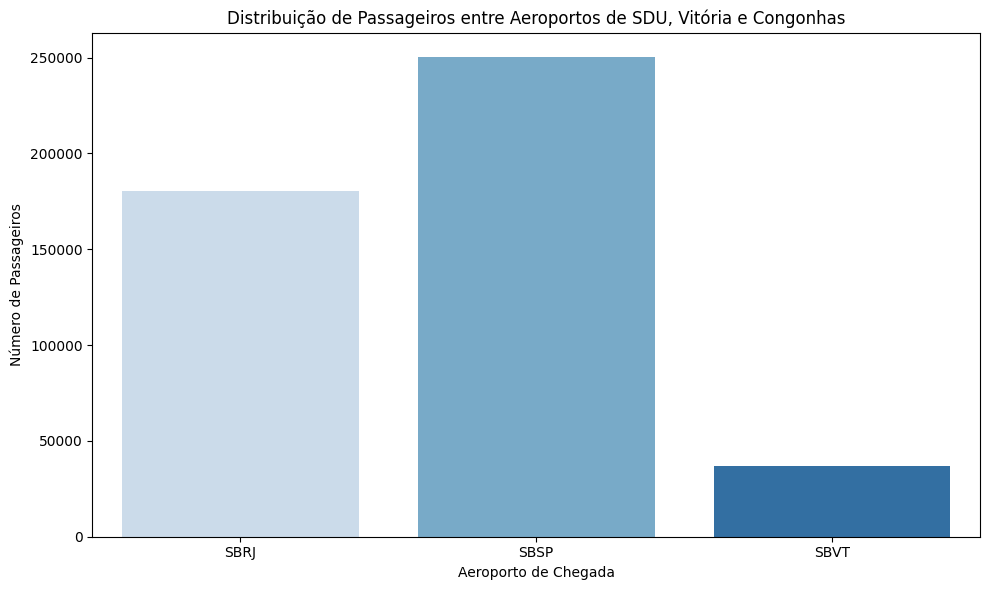

In [74]:
# Filtrar os dados para incluir voos que vão de 'SBRJ' para 'SBSP' ou 'SBVT', ou de 'SBSP' ou 'SBVT' para 'SBRJ'
voos_filtrados = dados[
    ((dados['NR_AEROPORTO_REFERENCIA'] == 'SBRJ') & ((dados['NR_VOO_OUTRO_AEROPORTO'] == 'SBSP') | (dados['NR_VOO_OUTRO_AEROPORTO'] == 'SBVT'))) |
    (((dados['NR_AEROPORTO_REFERENCIA'] == 'SBSP') | (dados['NR_AEROPORTO_REFERENCIA'] == 'SBVT')) & (dados['NR_VOO_OUTRO_AEROPORTO'] == 'SBRJ'))
]

# Calcular a quantidade total de passageiros para cada aeroporto de chegada
passageiros_por_aeroporto = voos_filtrados.groupby('NR_VOO_OUTRO_AEROPORTO')['QT_PAX_LOCAL', 'QT_PAX_CONEXAO_DOMESTICO', 'QT_PAX_CONEXAO_INTERNACIONAL'].sum()

# Calcular a quantidade total de passageiros para cada aeroporto de chegada
passageiros_por_aeroporto['Total_Passageiros'] = passageiros_por_aeroporto.sum(axis=1)

# Exibir o DataFrame resultante
# print(passageiros_por_aeroporto)

# Agrupar os dados por aeroporto de chegada
passageiros_por_aeroporto = voos_filtrados.groupby('NR_VOO_OUTRO_AEROPORTO')['QT_PAX_LOCAL', 'QT_PAX_CONEXAO_DOMESTICO', 'QT_PAX_CONEXAO_INTERNACIONAL'].sum().reset_index()

# Criar o gráfico de barras usando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=passageiros_por_aeroporto, x='NR_VOO_OUTRO_AEROPORTO', y='QT_PAX_LOCAL', palette='Blues')

# Adicionar rótulos e título
plt.xlabel('Aeroporto de Chegada')
plt.ylabel('Número de Passageiros')
plt.title('Distribuição de Passageiros entre Aeroportos de SDU, Vitória e Congonhas')

# Exibir o gráfico
plt.tight_layout()
plt.show()

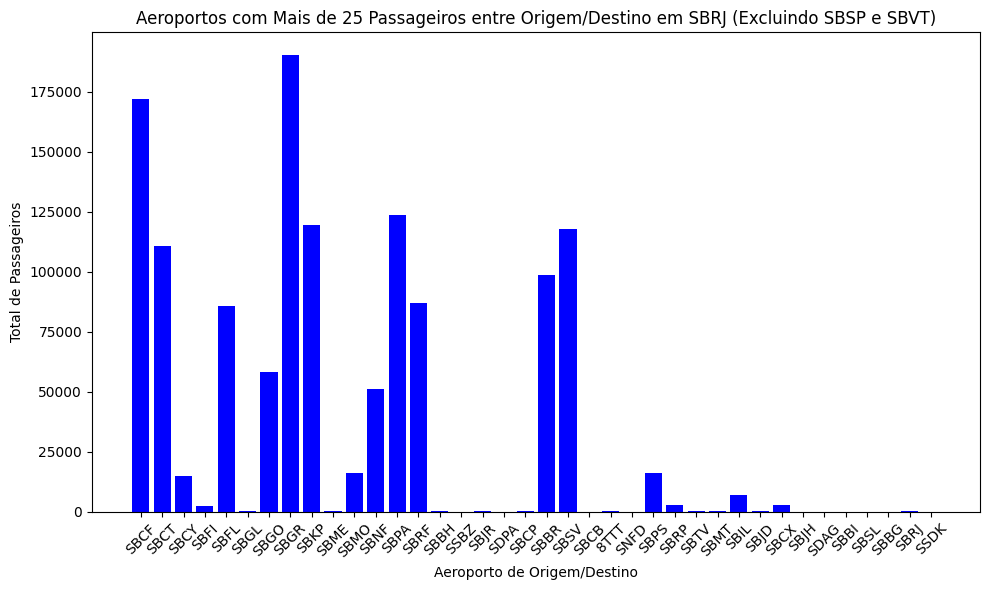

In [70]:
# Filtrar os voos que têm 'SBRJ' como origem ou chegada e não têm 'SBSP' ou 'SBVT' como origem ou chegada
voos_filtrados = dados[
    ((dados['NR_AEROPORTO_REFERENCIA'] == 'SBRJ') | (dados['NR_VOO_OUTRO_AEROPORTO'] == 'SBRJ')) &
    (~(dados['NR_AEROPORTO_REFERENCIA'].isin(['SBSP', 'SBVT']) | dados['NR_VOO_OUTRO_AEROPORTO'].isin(['SBSP', 'SBVT'])))
]

# Criar um dicionário para armazenar a quantidade total de passageiros por aeroporto
passageiros_por_aeroporto = {}

# Calcular a quantidade total de passageiros para cada aeroporto de origem/destino
for index, voo in voos_filtrados.iterrows():
    aeroporto = voo['NR_AEROPORTO_REFERENCIA'] if voo['NR_AEROPORTO_REFERENCIA'] != 'SBRJ' else voo['NR_VOO_OUTRO_AEROPORTO']
    passageiros = voo['QT_PAX_LOCAL'] + voo['QT_PAX_CONEXAO_DOMESTICO'] + voo['QT_PAX_CONEXAO_INTERNACIONAL']

    if aeroporto in passageiros_por_aeroporto:
        passageiros_por_aeroporto[aeroporto] += passageiros
    else:
        passageiros_por_aeroporto[aeroporto] = passageiros

# Filtrar apenas os aeroportos com mais de 25 passageiros
aeroportos_mais_de_25_passageiros = {aeroporto: passageiros for aeroporto, passageiros in passageiros_por_aeroporto.items() if passageiros > 25}

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(aeroportos_mais_de_25_passageiros.keys(), aeroportos_mais_de_25_passageiros.values(), color='blue')

# Adicionar rótulos e título
plt.xlabel('Aeroporto de Origem/Destino')
plt.ylabel('Total de Passageiros')
plt.title('Aeroportos com Mais de 25 Passageiros entre Origem/Destino em SBRJ (Excluindo SBSP e SBVT)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

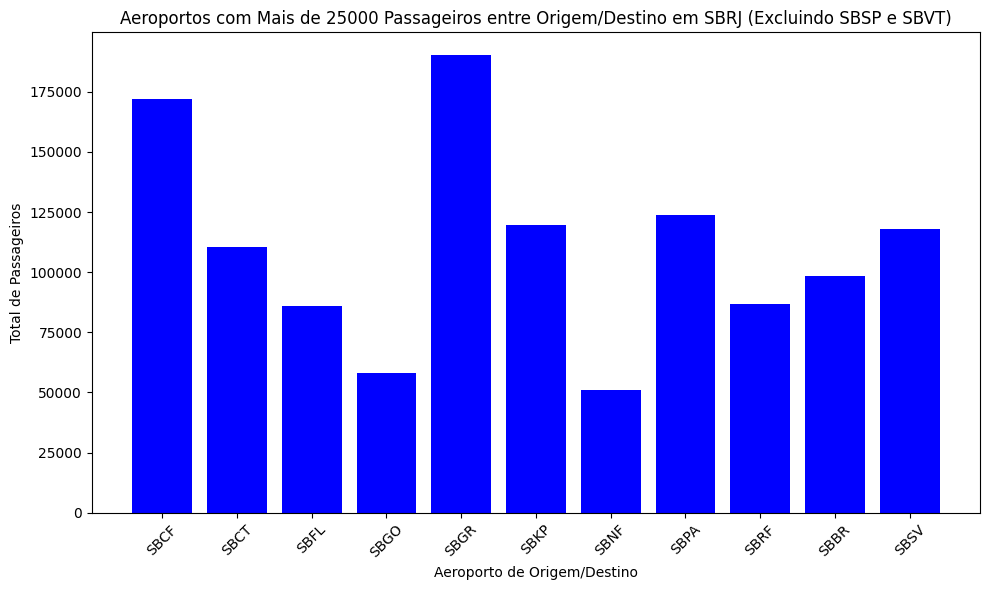

In [71]:
# Filtrar apenas os aeroportos com mais de 25000 passageiros
aeroportos_mais_de_25000_passageiros = {aeroporto: passageiros for aeroporto, passageiros in passageiros_por_aeroporto.items() if passageiros > 25000}

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(aeroportos_mais_de_25000_passageiros.keys(), aeroportos_mais_de_25000_passageiros.values(), color='blue')

# Adicionar rótulos e título
plt.xlabel('Aeroporto de Origem/Destino')
plt.ylabel('Total de Passageiros')
plt.title('Aeroportos com Mais de 25000 Passageiros entre Origem/Destino em SBRJ (Excluindo SBSP e SBVT)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()